In [1]:
import numpy as np
import Functions
import pickle
import os
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt

In [2]:
EventNames = ['AGN', 'CART', 'EB', 'ILOT', 'KN_B19', 'KN_K17', 'MIRA', 'Mdwarf',
              'PISN', 'RRL', 'SLSN-I', 'SNII-NMF', 'SNII-Templates', 'SNIIn',
              'SNIa-91bg', 'SNIa-SALT2', 'SNIax', 'SNIbc-MOSFIT',
              'SNIbc-Templates', 'TDE', 'V19_CC+HostXT', 'uLens-Binary',
              'uLens-Single-GenLens', 'uLens-Single_PyLIMA']

EventNames = [EventNames[19]]
EventNames

['TDE']

In [3]:
def Enquiry(HashTable, InfoDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):
    
    if abs(dT1) > abs(dT1-dT2):
        dT1, dT2 = dT1-dT2, -dT2    

    Ind1 = InfoDict['BandPairs'].index(Band1+Band2)
    
    dT1grid = InfoDict['dT1s'][ abs( dT1 - InfoDict['dT1s'] ).argmin() ]
    dT2grid = InfoDict['dT2s'][ abs( dT2 - InfoDict['dT2s'] ).argmin() ]
    
    TimePairGrid = [ InfoDict['dT1s'][ abs( dT1 - InfoDict['dT1s'] ).argmin() ], InfoDict['dT2s'][ abs( dT2 - InfoDict['dT2s'] ).argmin() ] ]
    
    Ind2 = np.where( (InfoDict['TimePairs'] == TimePairGrid ).all(axis=1) )[0][0]
    
    Results = HashTable[Ind1, Ind2]

    if dMag == None:
        pass        
    elif dMag<InfoDict['BinMag'][0] or dMag>=InfoDict['BinMag'][-1]:
        raise ValueError('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinMag'][0], InfoDict['BinMag'][-1]))        
    else:
        Results = Results[np.where( dMag >= InfoDict['BinMag'] )[0][-1]]       

    if Color == None:
        pass        
    elif Color<InfoDict['BinColor'][0] or Color>=InfoDict['BinColor'][-1]:
        raise ValueError('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinColor'][0], InfoDict['BinColor'][-1]))
        
    else:
        Results = Results[..., np.where( Color >= InfoDict['BinColor'] )[0][-1] ]

    return Results

In [16]:
aa = np.arange(10)

In [19]:
( aa[1:] - aa[:-1] ).min()

1

In [27]:
def loadCubeFile(FilePath):

    with open(FilePath, 'rb') as f:
        InfoDict = pickle.load(f)
        HashTable = pickle.load(f)
    
    dT1 = ( InfoDict['dT1s'][1:] - InfoDict['dT1s'][:-1] ).min()
    dT2 = ( InfoDict['dT2s'][1:] - InfoDict['dT2s'][:-1] ).min()
        
    print('{:<25} loaded successfully.\tObjectNo: {:>5}. dT1 = {:>3}, dT2 = {:>3}.'.format(InfoDict['EventName'], InfoDict['ObjectNo'], dT1, dT2))

    # InfoDict['OutliersRatio'] = InfoDict['Outliers'] / HashTable.sum()

    if 'Outliers' in InfoDict:
        print('\t{} outliers found, the ratio to the max value is {:.12f}.'.format(InfoDict['Outliers'], InfoDict['OutliersRatio']) )
        print('\tdMag range is {}, \n\tColor range is {}.'.format( InfoDict['dMagRange'], InfoDict['ColorRange'] ) )

    if 'Overflow' in InfoDict:
        print('\tData in the HashTable overflowed, the minimun value is {}.'.format(InfoDict['Overflow']))
        
    return InfoDict, HashTable;


In [11]:
PathCubeFolder = '/global/cscratch1/sd/lianming/Results'
CubeFileNames = os.listdir(PathCubeFolder)
CubeFileNames = [ ii for ii in CubeFileNames if '.pkl' in ii ]

In [12]:
len(CubeFileNames)

39

In [28]:
CubeFileNames

['ProbCube_0319_2109__RRL.pkl',
 'ProbCube_0318_1549__Mdwarf.pkl',
 'ProbCube_0318_1703__Mdwarf.pkl',
 'ProbCube_0318_1549__MIRA.pkl',
 'ProbCube_0319_2108__SLSN-I.pkl',
 'ProbCube_0319_2104__SNII-Templates.pkl',
 'ProbCube_0318_1622__CART.pkl',
 'ProbCube_0318_2223__SNII-NMF.pkl',
 'ProbCube_0319_2104__SNII-NMF.pkl',
 'ProbCube_0318_1702__CART.pkl',
 'ProbCube_0522_1409__RRL.pkl',
 'ProbCube_0318_1549__EB.pkl',
 'ProbCube_0318_1621__ILOT.pkl',
 'ProbCube_0318_1707__EB.pkl',
 'ProbCube_0319_2106__SNIIn.pkl',
 'ProbCube_0318_1549__CART.pkl',
 'ProbCube_0318_1549__ILOT.pkl',
 'ProbCube_0522_1407__SLSN-I.pkl',
 'ProbCube_0318_1705__PISN.pkl',
 'ProbCube_0318_1700__ILOT.pkl',
 'ProbCube_0522_1406__SNIIn.pkl',
 'ProbCube_0318_1549__PISN.pkl',
 'ProbCube_0318_2225__SLSN-I.pkl',
 'ProbCube_0318_1624__EB.pkl',
 'ProbCube_0318_2222__SNIIn.pkl',
 'ProbCube_0319_2109__PISN.pkl',
 'ProbCube_0318_2228__RRL.pkl',
 'ProbCube_0318_1623__MIRA.pkl',
 'ProbCube_0318_2226__PISN.pkl',
 'ProbCube_0318_2222_

In [8]:
CubeFileNames.sort()

In [9]:
CubeFileNames = CubeFileNames[10:23]

In [29]:
for FileName in CubeFileNames:
    FilePath = os.path.join(PathCubeFolder, FileName)
    loadCubeFile(FilePath)    

RRL                       loaded successfully.	ObjectNo: 10000. dT1 =  60, dT2 = 240.
Mdwarf                    loaded successfully.	ObjectNo:  1000. dT1 = 120, dT2 = 240.
Mdwarf                    loaded successfully.	ObjectNo:  9999. dT1 =  60, dT2 = 240.
MIRA                      loaded successfully.	ObjectNo:  1000. dT1 = 120, dT2 = 240.
SLSN-I                    loaded successfully.	ObjectNo: 10000. dT1 =  60, dT2 = 240.
SNII-Templates            loaded successfully.	ObjectNo: 10000. dT1 =  60, dT2 = 240.
CART                      loaded successfully.	ObjectNo: 10000. dT1 = 120, dT2 = 240.
SNII-NMF                  loaded successfully.	ObjectNo: 10000. dT1 =  60, dT2 = 240.
SNII-NMF                  loaded successfully.	ObjectNo: 10000. dT1 =  60, dT2 = 240.
	28 outliers found, the ratio to the max value is 0.000021733022.
	dMag range is [-0.7776056925469881, 6.218564976685435], 
	Color range is [-6.7229643537983, 6.597826432356047].
CART                      loaded successfully.	

In [20]:
EventNames = [ii[20:-4] for ii in CubeFileNames]

In [23]:
dT1s = np.arange(-480, 481, 60) #for test
dT2s = np.hstack(( np.arange(-1920, -1439, 240), np.arange(-480, 481, 240), np.arange(1440, 1921, 240) )) #for test

In [24]:
len(dT1s)

17

In [26]:
len(dT2s)

11

In [47]:
with open('/global/cscratch1/sd/lianming/Results/Tati/ProbCube_0110_1404__SNII-NMF.pkl', 'rb') as f:
    InfoDict = pickle.load(f)
    HashTable = pickle.load(f)

In [57]:
with open('/global/cscratch1/sd/lianming/Results/Tati/ProbCube_0110_2240__SNII-NMF.pkl', 'rb') as f:
    InfoDict1 = pickle.load(f)
    HashTable1 = pickle.load(f)

(-5.0, 8.0)

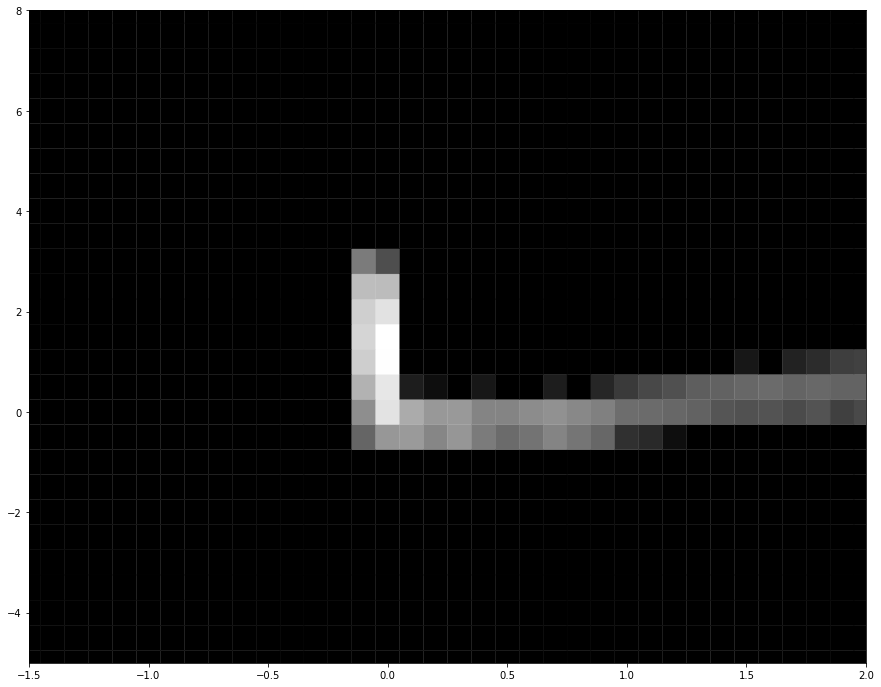

In [53]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

Map = Enquiry(HashTable, InfoDict, 'g', 'i', 480, 1440)
plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
plt.xlim([-1.5, 2])
plt.ylim([-5, 8])
# plt.axis('equal')

(-5.0, 8.0)

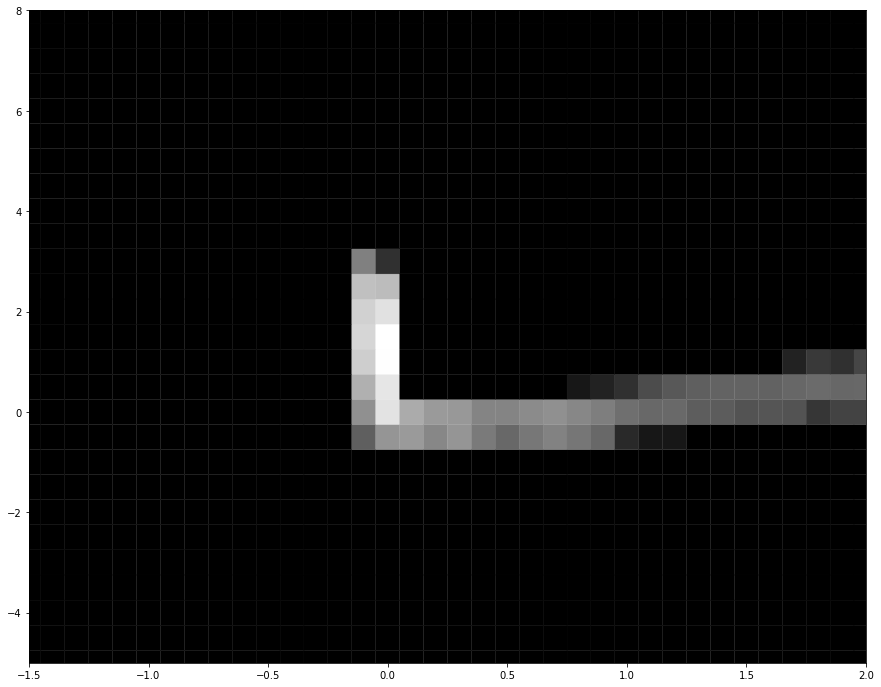

In [58]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

Map = Enquiry(HashTable1, InfoDict1, 'g', 'i', 480, 1440)
plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
plt.xlim([-1.5, 2])
plt.ylim([-5, 8])
# plt.axis('equal')

In [44]:
data = Functions.ReadData('/global/homes/l/lianming/Presto-Color-2/data/GSN_IDEAL_z02/', 'SNII-Templates', 18)

In [33]:
data1 = Functions.ReadData('/global/homes/l/lianming/Presto-Color-2/data/GSN_IDEAL_z02/', 'SNIa-SALT2', 19)

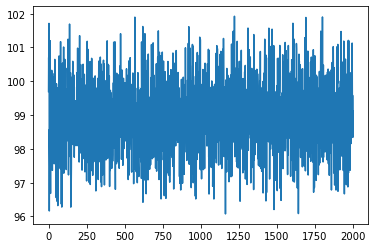

In [45]:
Min = []
for dd in data:
    Min.append(max(dd['SIM_MAGOBS']))
plt.plot(Min)    

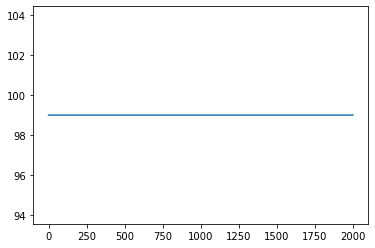

In [43]:
Min = []
for dd in data1:
    Min.append(max(dd['SIM_MAGOBS']))
plt.plot(Min)    

In [36]:
Functions.PlotLightCurve?

Signature:
Functions.PlotLightCurve(
    Path,
    Band,
    EventName=None,
    SeedFile=None,
    SeedObj=None,
    Prop='SIM_MAGOBS',
    thr=27.5,
    AlignPeak=True,
    FigNo=None,
    FileNo=None,
    ObjNo=None,
    ls=None,
    PlotSizeRatio=1,
    Space=False,
    marker=None,
    sharex=True,
    sharey='none',
    Range=[0, 200],
    Shadow=None,
    xlim=None,
    ylim=None,
)
Docstring: asfasfasfdasf.
File:      /global/u2/l/lianming/Presto-Color-2/Functions.py
Type:      function


40000
40000


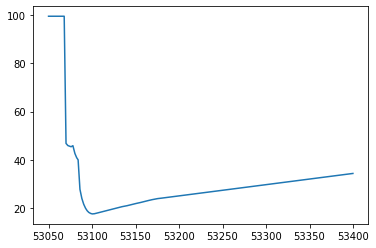

In [20]:
PathInterp = '/global/cscratch1/sd/lianming/data/2Day_Interp'
EventName = 'SNII-Templates'
FilePath = os.path.join(PathInterp, EventName+'_Interp.pkl')

with open(FilePath, 'rb') as f:
    Interp_load = pickle.load(f)
    TimeRange_load = pickle.load(f)
    
print(len(Interp_load['g']))
print(len(TimeRange_load['g']))

xx = np.arange( TimeRange_load['g'][-1][0], TimeRange_load['g'][-1][1], 0.1)

plt.plot(xx, Interp_load['g'][-1](xx))

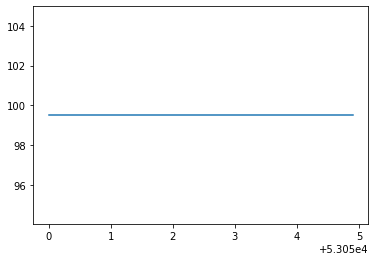

In [27]:
XX = xx[:50]
plt.plot(XX, Interp_load['g'][-1](XX))

In [28]:
Interp_load['g'][-1](XX)

array([99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706,
       99.50660706, 99.50660706, 99.50660706, 99.50660706, 99.50660706])

In [49]:
InfoDict, HashTable = loadCubeFile('/global/cscratch1/sd/lianming/Results/Test_26_BandPair_30min_dT1/ProbCube_1229_0024__SNII-NMF.pkl')

SNII-NMF                  loaded successfully.	ObjectNo: 1000.
	3 outliers found, the ratio to the max value is 0.000000000397.
	dMag range is [-0.7759653727227658, 6.202512798141445], 
	Color range is [-6.428307530269848, 6.293819014421469].


In [26]:
with open(FilePath, 'rb') as f:
        InfoDict = pickle.load(f)
        HashTable = pickle.load(f)

In [27]:
List = InfoDict['BandPairs'] 

In [30]:
%%timeit
InfoDict['BandPairs'] = List
InfoDict.pop('BandPairs')

117 ns ± 5.29 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [31]:
%%timeit
InfoDict['BandPairs'] = List
del InfoDict['BandPairs']

87.2 ns ± 1.18 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [43]:
dT1s = np.arange(-480, 481, 15)
dT2s = np.hstack(( np.arange(-1920, -1439, 30), np.arange(-480, 481, 30), np.arange(1440, 1921, 30) )) 
TimePairs = [ [ii, jj] for ii in dT1s for jj in dT2s if abs(ii) <= abs(jj) ]

In [44]:
len(TimePairs)

3331

In [41]:
dT1s = np.arange(-480, 481, 15)
dT2s = np.hstack(( np.arange(-1920, -1439, 30), np.arange(-480, 481, 30), np.arange(1440, 1921, 30) )) 
TimePairs = [ [ii, jj] for ii in dT1s for jj in dT2s if abs(ii) <= abs(ii-jj) ]

In [42]:
len(TimePairs)

3603

(-5.0, 8.0)

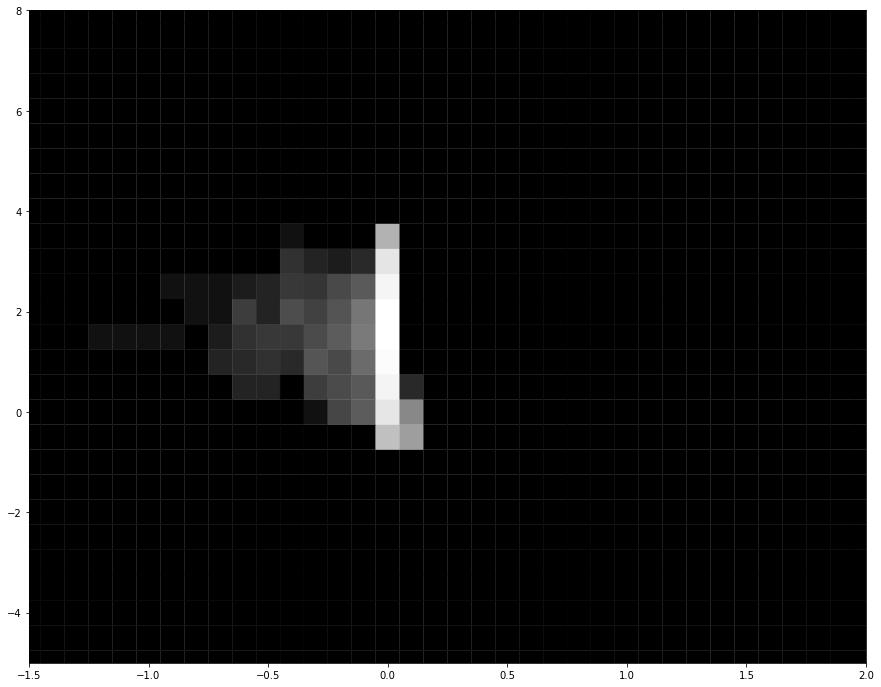

In [16]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

Map = Enquiry(HashTable, InfoDict, 'g', 'i', 60, 450)
plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
plt.xlim([-1.5, 2])
plt.ylim([-5, 8])
# plt.axis('equal')

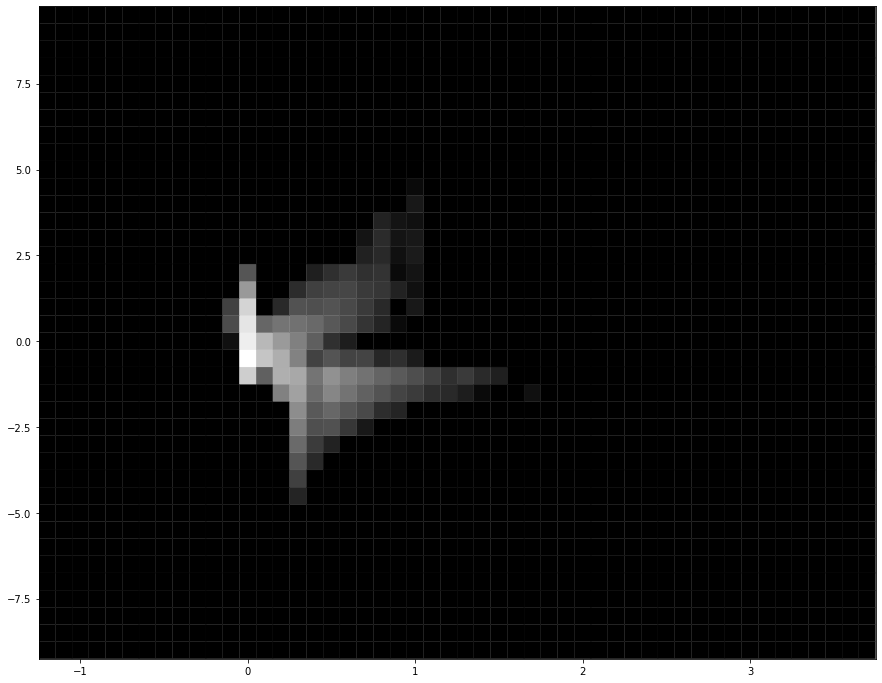

In [49]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

Map = Enquiry(HashTable, InfoDict, 'g', 'i', 60, 450)
plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
# plt.xlim([-0.5, 2])
# plt.ylim([-7.5, 4])
# plt.axis('equal')

In [58]:
dT1s = np.arange(-480, 481, 15)
dT2s = np.hstack(( np.arange(-1920, -1439, 30), np.arange(-480, 481, 30), np.arange(1440, 1921, 30) )) 


In [90]:
Bands = ['u', 'g', 'r', 'i', 'z', 'Y']
BandPairs = [B1+B2 for B1 in Bands for B2 in Bands if B1!=B2 and B1+B2!='uz' and B1+B2!='zu' and B1+B2!='uY' and B1+B2!='Yu']


In [300]:
dT1s = np.arange(-480, 481, 60)
dT2s = np.hstack(( np.arange(-1920, -1439, 120), np.arange(-480, 481, 120), np.arange(1440, 1921, 120) )) 

dT1s = np.arange(-480, 481, 120) #for test
dT2s = np.hstack(( np.arange(-1920, -1439, 240), np.arange(-480, 481, 240), np.arange(1440, 1921, 240) )) #for test

TimePairs = [ [ii, jj] for ii in dT1s for jj in dT2s if abs(ii) <= abs(jj) ]

In [16]:
data = CalculateMap('/content/drive/Shareddrives/FASTlab/PrestoColor2/Interpolated Data', 'SNIa-SALT2', 'g', 'i', 60, 450, PointsPDay=0.1)

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Finish!


([<matplotlib.lines.Line2D at 0x7f3a8f9e22d0>],
 <matplotlib.contour.QuadContourSet at 0x7f3a8f9bdd50>)

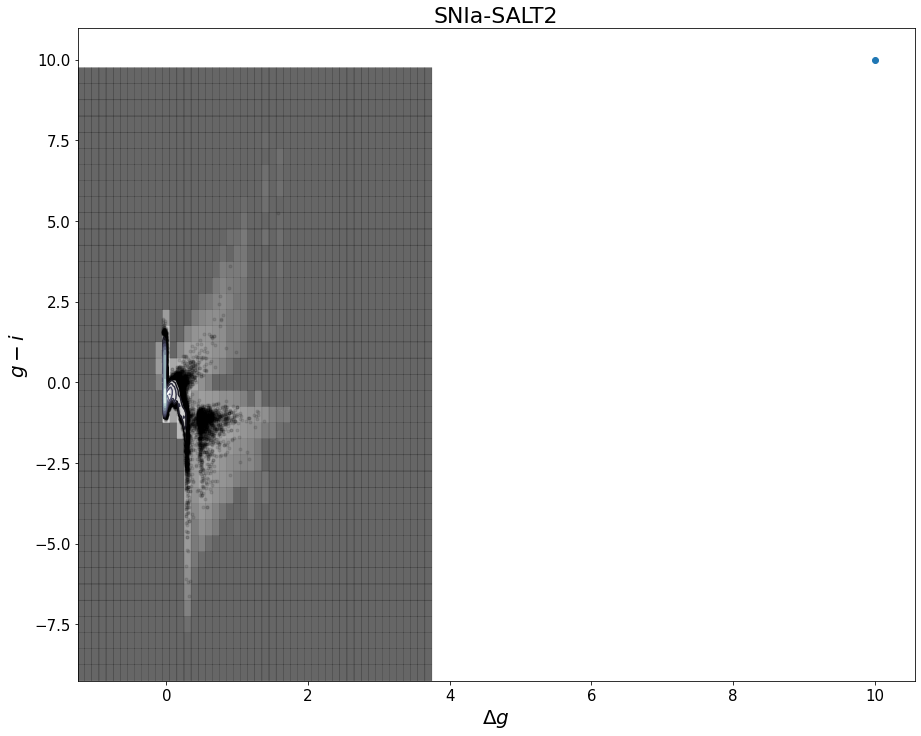

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
ax.set_xlabel("$\Delta {0}$".format('g'), fontsize=20)
ax.set_ylabel('${0}-{1}$'.format('g','i'), fontsize=20)
ax.tick_params(labelsize=15 )
ax.set_title('SNIa-SALT2', fontsize=22)

plt.xlim([-0.3, 1.8])
plt.ylim([-7.5, 4])

plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0])+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map[0,0].max()+1), cmap='gist_gray', alpha=0.6)

ax.scatter([10], [10])

plotting.scatter_contour(data[0], data[1], 
                         threshold=50,log_counts=True, 
                         histogram2d_args=dict(bins=(100,100)), filled_contour=False,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))

In [15]:
def CalculateMap(PathInterp, EventName, Band1, Band2, dT1, dT2, PointsPDay = 50, Thr=27.5, Save=0, TargetFolder='MapData'):    
    
    FilePath = os.path.join(PathInterp, EventName+'_Interp.pkl')
    
    with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)    

    dMag = []
    Color = []

    for II in range(len(Interp_load[Band1])):
        
        if Interp_load[Band1][II]==[] or Interp_load[Band2][II]==[]:
            continue
        
        if II%5000 == 4999:
            print('|')
        elif II%50 == 49:
            print('|', end='' )

        TimeRangeStart = max( TimeRange_load[Band1][II][0], TimeRange_load[Band2][II][0] - dT1/1440 )
        TimeRangeEnd = min( TimeRange_load[Band1][II][1] - dT2/1440, TimeRange_load[Band2][II][1] - dT1/1440 )

        TimeRange = TimeRangeEnd - TimeRangeStart
        SampleNo = np.int(PointsPDay*TimeRange)
        
        XX = np.random.rand(SampleNo)*TimeRange + TimeRangeStart

        Mag1 = Interp_load[Band1][II](XX)
        Mag2 = Interp_load[Band2][II](XX+dT1/1440)
        Mag12 = Interp_load[Band1][II](XX+dT2/1440)

        Mask = (Mag1<Thr) * (Mag2<Thr) *(Mag12<Thr)

        dMag.extend(Mag1[Mask] - Mag12[Mask])
        Color.extend(Mag1[Mask] - Mag2[Mask])
        
    data = np.array([dMag, Color])
    
    if Save == 1:
    
        TargetPath = os.path.join(Path0, TargetFolder)                            
        if not os.path.isdir(TargetPath):
            os.mkdir(TargetPath)
        os.chdir(TargetPath)

        Ind1 = PathInterp.rfind('/')
        Ind2 = PathInterp.rfind('_')
        
        FileName = '{}{}_dT1_{}_dT2_{}_PPD{}_Thr{}_{}_Source_{}.npy'.format(Band1, Band2, dT1, dT2, PointsPDay, Thr, EventName, PathInterp[Ind1+1:Ind2])
        np.save(FileName, data)
        
        print('The data is saved at {} as {}.'.format(TargetPath, FileName))
    
    print('Finish!')
        
    return data

In [47]:
FilePath = '/global/homes/l/lianming/Presto-Color-2/data/2Day_Interp/SNIa-SALT2_Interp.pkl'

In [48]:
with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)  

In [277]:
Objects = np.arange(40000)
Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 600
PointsPerDay=1

BinMag = InfoDict['BinMag']
BinColor = InfoDict['BinColor']

Thrs = {'u': 23.9, 'g': 25.0, 'r': 24.7, 'i': 24.0, 'z': 23.3, 'Y': 22.1}

In [293]:
%%timeit
dMag = []
Color = []

for II in Objects:

    if Interp_load[Band1][II]==[] or Interp_load[Band2][II]==[]:
        continue

    #Decide the range and the length of XX.
    TimeRangeStart = max( TimeRange_load[Band1][II][0], TimeRange_load[Band2][II][0] - dT1/1440, TimeRange_load[Band1][II][0] - dT2/1440 )
    TimeRangeEnd = min( TimeRange_load[Band1][II][1], TimeRange_load[Band1][II][1] - dT2/1440, TimeRange_load[Band2][II][1] - dT1/1440 )

    TimeRange = TimeRangeEnd - TimeRangeStart
    if TimeRange<=0:
        continue

    SampleNo = int(PointsPerDay*TimeRange)

    XX = np.random.rand(SampleNo)*TimeRange + TimeRangeStart

    #Calculate the values of the functions with selected x values.  
    Mag1 = Interp_load[Band1][II](XX)
    Mag2 = Interp_load[Band2][II](XX+dT1/1440)
    Mag12 = Interp_load[Band1][II](XX+dT2/1440)

    #Add a threshold for the results and output.
    Mask = (Mag1<Thrs[Band1]) * (Mag2<Thrs[Band2]) * (Mag12<Thrs[Band1])

    dMag.extend(  (Mag1[Mask] - Mag12[Mask])*np.sign(dT2) )
    Color.extend(Mag1[Mask] - Mag2[Mask])

# data = np.array([dMag, Color])
histdata,_,_ = np.histogram2d(dMag, Color, bins=[BinMag, BinColor])

17 s ± 426 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [292]:
%%timeit

HistData = np.zeros( (len(BinMag)-1, len(BinColor)-1), dtype=np.uint32)

for II in Objects:

    if Interp_load[Band1][II]==[] or Interp_load[Band2][II]==[]:
        continue

    #Decide the range and the length of XX.
    TimeRangeStart = max( TimeRange_load[Band1][II][0], TimeRange_load[Band2][II][0] - dT1/1440, TimeRange_load[Band1][II][0] - dT2/1440 )
    TimeRangeEnd = min( TimeRange_load[Band1][II][1], TimeRange_load[Band1][II][1] - dT2/1440, TimeRange_load[Band2][II][1] - dT1/1440 )

    TimeRange = TimeRangeEnd - TimeRangeStart
    if TimeRange<=0:
        continue

    SampleNo = int(PointsPerDay*TimeRange)

    XX = np.random.rand(SampleNo)*TimeRange + TimeRangeStart

    #Calculate the values of the functions with selected x values.  
    Mag1 = Interp_load[Band1][II](XX)
    Mag2 = Interp_load[Band2][II](XX+dT1/1440)
    Mag12 = Interp_load[Band1][II](XX+dT2/1440)

    #Add a threshold for the results and output.
    Mask = (Mag1<Thrs[Band1]) * (Mag2<Thrs[Band2]) * (Mag12<Thrs[Band1])
    
    hh,_,_ = np.histogram2d( (Mag1[Mask] - Mag12[Mask])*np.sign(dT2), Mag1[Mask] - Mag2[Mask], bins=[BinMag, BinColor])
    
    HistData += hh.astype(dtype=np.uint32)

21.3 s ± 1.28 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
#Older version
def Enquiry(HashTable, InfoDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):

    Ind1 = InfoDict['BandPairs'].index(Band1+Band2)
    
    Ind2 = abs( dT1 - InfoDict['dT1s'] ).argmin()
    Ind3 = abs( dT2 - InfoDict['dT2s'] ).argmin()

    if dT1<InfoDict['dT1s'][0] or dT1>InfoDict['dT1s'][-1]:
        raise ValueError('The value of dT1 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT1s'][0], InfoDict['dT1s'][-1]))
        
    else:
        Ind3 = np.where( dT1 >= InfoDict['dT1s'] )[0][-1]

    if dT2<InfoDict['dT2s'][0] or dT2>InfoDict['dT2s'][-1]:
        raise ValueError('The value of dT2 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT2s'][0], InfoDict['dT2s'][-1]))
    else:
        Ind4 = np.where( dT2 >= InfoDict['dT2s'] )[0][-1]

    Results = HashTable[Ind1, Ind2, Ind3, Ind4]

    if dMag == None:
        pass        
    elif dMag<InfoDict['BinMag'][0] or dMag>=InfoDict['BinMag'][-1]:
        raise ValueError('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinMag'][0], InfoDict['BinMag'][-1]))
        
    else:
        Results = Results[np.where( dMag >= InfoDict['BinMag'] )[0][-1]]       

    if Color == None:
        pass        
    elif Color<InfoDict['BinColor'][0] or Color>=InfoDict['BinColor'][-1]:
        raise ValueError('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinColor'][0], InfoDict['BinColor'][-1]))
        
    else:
        Results = Results[..., np.where( Color >= InfoDict['BinColor'] )[0][-1] ]

    return Results

In [40]:
InfoDict.pop('ObjectNo')

1000

In [50]:
InfoDict

{'EventName': 'SNII-NMF',
 'PointsPerDay': 1,
 'ObjectNo': 1000,
 'BandPairs': ['ug',
  'ur',
  'ui',
  'gu',
  'gr',
  'gi',
  'gz',
  'gy',
  'ru',
  'rg',
  'ri',
  'rz',
  'ry',
  'iu',
  'ig',
  'ir',
  'iz',
  'iy',
  'zg',
  'zr',
  'zi',
  'zy',
  'yg',
  'yr',
  'yi',
  'yz'],
 'dT1s': array([-480, -450, -420, -390, -360, -330, -300, -270, -240, -210, -180,
        -150, -120,  -90,  -60,  -30,    0,   30,   60,   90,  120,  150,
         180,  210,  240,  270,  300,  330,  360,  390,  420,  450,  480]),
 'dT2s': array([-1920, -1890, -1860, -1830, -1800, -1770, -1740, -1710, -1680,
        -1650, -1620, -1590, -1560, -1530, -1500, -1470, -1440,  -480,
         -450,  -420,  -390,  -360,  -330,  -300,  -270,  -240,  -210,
         -180,  -150,  -120,   -90,   -60,   -30,     0,    30,    60,
           90,   120,   150,   180,   210,   240,   270,   300,   330,
          360,   390,   420,   450,   480,  1440,  1470,  1500,  1530,
         1560,  1590,  1620,  1650,  1680,  171